# CORD-19 overview

In this notebook, we provide an overview of publication medatata for CORD-19.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

# magics and warnings
%load_ext autoreload
%autoreload 2
import warnings; warnings.simplefilter('ignore')

import os, random, codecs, json
import pandas as pd
import numpy as np

seed = 99
random.seed(seed)
np.random.seed(seed)

import nltk, sklearn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2.5})

In [3]:
# load metadata

df_meta = pd.read_csv("datasets_output/df_pub.csv",compression="gzip")
df_datasource = pd.read_csv("datasets_output/sql_tables/datasource.csv",sep="\t",header=None,names=['datasource_metadata_id', 'datasource', 'url'])
df_pub_datasource = pd.read_csv("datasets_output/sql_tables/pub_datasource.csv",sep="\t",header=None,names=['pub_id','datasource_metadata_id'])
df_cord_meta = pd.read_csv("datasets_output/sql_tables/cord19_metadata.csv",sep="\t",header=None,names=['cord19_metadata_id', 'source', 'license', 'full_text_file', 'ms_academic_id',
       'who_covidence', 'sha', 'full_text', 'pub_id'])

In [4]:
df_meta.head()

,pub_id,title,abstract,publication_year,publication_month,journal,volume,issue,pages,doi,pmid,pmcid,timestamp
0,0,‘A ticking time bomb’: Scientists worry about ...,"CAPE TOWN, SOUTH AFRICA—Late on Sunday evening...",2020.0,NaN,Science,NaN,NaN,NaN,0.1126/science.abb7331,NaN,NaN,2020-04-04 07:55:51.892454
1,1,[Ten hot issues of breast cancer under the nov...,NaN,2020.0,2.0,Chinese medical journal,100,0,e002,10.0376/cma.j.issn.0376-2491.2020.0002,32036640.0,NaN,2020-04-04 07:55:51.892454
2,2,Another Piece of the Puzzle: Human Metapneumov...,BACKGROUND: Each winter respiratory viruses ac...,2008.0,12.0,Archives of Internal Medicine,NaN,NaN,NaN,10.1001/archinte.168.22.2489,19064834.0,PMC2783624,2020-04-04 07:55:51.892454
3,3,Viral etiology of severe pneumonia among Kenya...,CONTEXT: Pneumonia is the leading cause of chi...,2010.0,5.0,JAMA,NaN,NaN,NaN,10.1001/jama.2010.675,20501927.0,PMC2968755,2020-04-04 07:55:51.892454
4,4,Critically Ill Patients With Influenza A(H1N1)...,NaN,2014.0,4.0,JAMA,NaN,NaN,NaN,10.1001/jama.2014.2116,24566924.0,PMC6689404,2020-04-04 07:55:51.892454


In [5]:
df_meta.columns

Index(['pub_id', 'title', 'abstract', 'publication_year', 'publication_month',
       'journal', 'volume', 'issue', 'pages', 'doi', 'pmid', 'pmcid',
       'timestamp'],
      dtype='object')

In [6]:
df_datasource

,datasource_metadata_id,datasource,url
0,0,CORD19,https://pages.semanticscholar.org/coronavirus-...
1,1,Dimensions,https://docs.google.com/spreadsheets/d/1-kTZJZ...
2,2,WHO,https://www.who.int/emergencies/diseases/novel...


#### Select just CORD-19

In [7]:
df_meta = df_meta.merge(df_pub_datasource, how="inner", left_on="pub_id", right_on="pub_id")
df_meta = df_meta.merge(df_datasource, how="inner", left_on="datasource_metadata_id", right_on="datasource_metadata_id")
df_cord19 = df_meta[df_meta.datasource_metadata_id==0]
df_cord19 = df_cord19.merge(df_cord_meta, how="inner", left_on="pub_id", right_on="pub_id")

In [8]:
df_meta.shape

(56809, 16)

In [9]:
df_cord19.shape

(46994, 24)

In [10]:
df_cord19.head()

,pub_id,title,abstract,publication_year,publication_month,journal,volume,issue,pages,doi,...,datasource,url,cord19_metadata_id,source,license,full_text_file,ms_academic_id,who_covidence,sha,full_text
0,0,‘A ticking time bomb’: Scientists worry about ...,"CAPE TOWN, SOUTH AFRICA—Late on Sunday evening...",2020.0,NaN,Science,NaN,NaN,NaN,0.1126/science.abb7331,...,CORD19,https://pages.semanticscholar.org/coronavirus-...,0,WHO,unk,NaN,NaN,#8463,NaN,NaN
1,1,[Ten hot issues of breast cancer under the nov...,NaN,2020.0,2.0,Chinese medical journal,100,0,e002,10.0376/cma.j.issn.0376-2491.2020.0002,...,CORD19,https://pages.semanticscholar.org/coronavirus-...,1,WHO,unk,NaN,3.003451e+09,#615,NaN,NaN
2,2,Another Piece of the Puzzle: Human Metapneumov...,BACKGROUND: Each winter respiratory viruses ac...,2008.0,12.0,Archives of Internal Medicine,NaN,NaN,NaN,10.1001/archinte.168.22.2489,...,CORD19,https://pages.semanticscholar.org/coronavirus-...,2,PMC,unk,NaN,NaN,NaN,NaN,NaN
3,3,Viral etiology of severe pneumonia among Kenya...,CONTEXT: Pneumonia is the leading cause of chi...,2010.0,5.0,JAMA,NaN,NaN,NaN,10.1001/jama.2010.675,...,CORD19,https://pages.semanticscholar.org/coronavirus-...,3,PMC,unk,NaN,NaN,NaN,NaN,NaN
4,4,Critically Ill Patients With Influenza A(H1N1)...,NaN,2014.0,4.0,JAMA,NaN,NaN,NaN,10.1001/jama.2014.2116,...,CORD19,https://pages.semanticscholar.org/coronavirus-...,4,PMC,unk,NaN,NaN,NaN,NaN,NaN


#### Publication years

In [11]:
import re

def clean_year(s):
    if pd.isna(s):
        return np.nan
    if not (s>1900):
        return np.nan
    elif s>2020:
        return 2020
    return s

df_cord19["publication_year"] = df_cord19["publication_year"].apply(clean_year)

In [12]:
df_cord19.publication_year.describe()

count    46991.000000
mean      2010.591581
std          8.886860
min       1951.000000
25%       2007.000000
50%       2013.000000
75%       2017.000000
max       2020.000000
Name: publication_year, dtype: float64

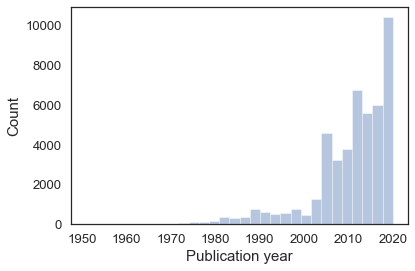

In [13]:
sns.distplot(df_cord19.publication_year.tolist(), bins=30, kde=False)
plt.xlabel("Publication year", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.tight_layout()
plt.savefig("figures/publication_year_all.pdf")

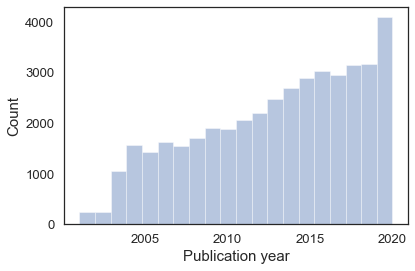

In [14]:
sns.distplot(df_cord19[(pd.notnull(df_cord19.publication_year)) & (df_cord19.publication_year > 2000)].publication_year.tolist(), bins=20, hist=True, kde=False)
plt.xlabel("Publication year", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.tight_layout()
plt.savefig("figures/publication_year_2000.pdf")

In [15]:
# recent uptake
df_cord19[df_cord19.publication_year>2018].groupby([(df_cord19.publication_year),(df_cord19.publication_month)]).count().pub_id

publication_year  publication_month
2019.0            1.0                   253
                  2.0                   273
                  3.0                   272
                  4.0                   284
                  5.0                   247
                  6.0                   256
                  7.0                   232
                  8.0                   230
                  9.0                   220
                  10.0                  259
                  11.0                  240
                  12.0                  387
2020.0            1.0                   458
                  2.0                   978
                  3.0                  2107
                  4.0                   240
                  5.0                    49
                  6.0                    31
                  7.0                    11
                  8.0                     5
                  11.0                    1
                  12.0                  

#### Null values

In [16]:
df_cord19.shape

(46994, 24)

In [17]:
df_cord19["abstract_length"] = df_cord19.abstract.str.len()

In [18]:
df_cord19[df_cord19.abstract_length>0].shape

(38645, 25)

In [19]:
sum(pd.notnull(df_cord19.abstract))

38645

In [20]:
sum(pd.notnull(df_cord19.doi))

43956

In [21]:
sum(pd.notnull(df_cord19.pmcid))

28156

In [22]:
sum(pd.notnull(df_cord19.pmid))

36090

In [23]:
sum(pd.notnull(df_cord19.journal))

43454

#### Journals

In [28]:
df_cord19.journal.value_counts()[:30]

Journal of Virology                                1744
PLoS One                                           1557
Virology                                            866
Emerg Infect Dis                                    741
medRxiv                                             674
The Lancet                                          608
Viruses                                             568
Arch Virol                                          500
Virus Research                                      496
Vaccine                                             484
Sci Rep                                             480
Veterinary Microbiology                             443
Journal of Virological Methods                      393
Journal of Clinical Virology                        379
The Lancet Infectious Diseases                      366
PLoS Pathog                                         357
Virol J                                             356
Antiviral Research                              

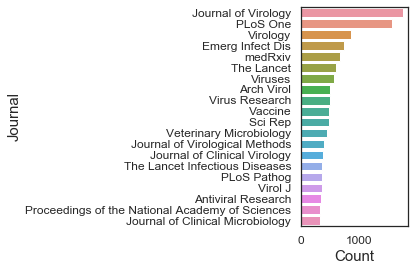

In [269]:
df_sub = df_cord19[df_cord19.journal.isin(df_cord19.journal.value_counts()[:20].index.tolist())]
b = sns.countplot(y="journal", data=df_sub, order=df_sub['journal'].value_counts().index)
#b.axes.set_title("Title",fontsize=50)
b.set_xlabel("Count",fontsize=15)
b.set_ylabel("Journal",fontsize=15)
b.tick_params(labelsize=12)
plt.tight_layout()
plt.savefig("figures/journals.pdf")

#### Sources and licenses

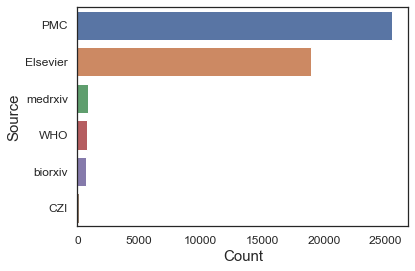

In [242]:
# source
df_sub = df_cord19[df_cord19.source.isin(df_cord19.source.value_counts()[:30].index.tolist())]
b = sns.countplot(y="source", data=df_sub, order=df_sub['source'].value_counts().index)
#b.axes.set_title("Title",fontsize=50)
b.set_xlabel("Count",fontsize=15)
b.set_ylabel("Source",fontsize=15)
b.tick_params(labelsize=12)
plt.tight_layout()
plt.savefig("figures/sources.pdf")

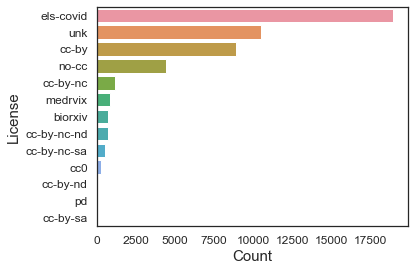

In [243]:
# license
df_sub = df_cord19[df_cord19.license.isin(df_cord19.license.value_counts()[:30].index.tolist())]
b = sns.countplot(y="license", data=df_sub, order=df_sub['license'].value_counts().index)
#b.axes.set_title("Title",fontsize=50)
b.set_xlabel("Count",fontsize=15)
b.set_ylabel("License",fontsize=15)
b.tick_params(labelsize=12)
plt.tight_layout()
plt.savefig("figures/licenses.pdf")

#### Full text availability

In [244]:
df_cord19["has_full_text"] = pd.notnull(df_cord19.full_text)

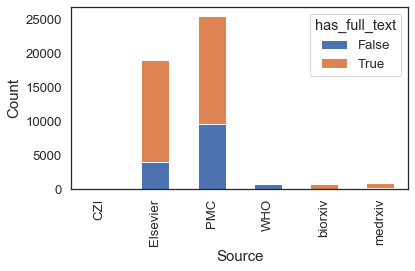

In [245]:
# full text x source
df_plot = df_cord19.groupby(['has_full_text', 'source']).size().reset_index().pivot(columns='has_full_text', index='source', values=0)
df_plot.plot(kind='bar', stacked=True)
plt.xlabel("Source", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.tight_layout()
plt.savefig("figures/source_ft.pdf")

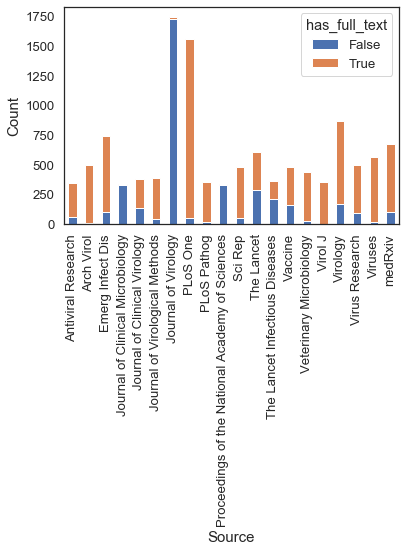

In [281]:
# full text x journal
df_sub = df_cord19[df_cord19.journal.isin(df_cord19.journal.value_counts()[:20].index.tolist())]
df_plot = df_sub.groupby(['has_full_text', 'journal']).size().reset_index().pivot(columns='has_full_text', index='journal', values=0)
df_plot.plot(kind='bar', stacked=True)
plt.xlabel("Source", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.tight_layout()
plt.savefig("figures/journal_ft.pdf")

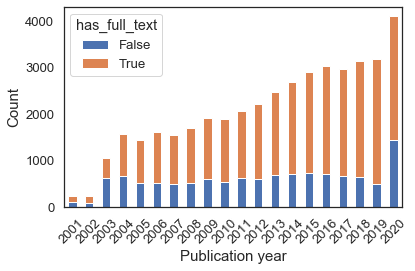

In [276]:
# full text x year
df_sub = df_cord19[(pd.notnull(df_cord19.publication_year)) & (df_cord19.publication_year > 2000)]
df_plot = df_sub.groupby(['has_full_text', 'publication_year']).size().reset_index().pivot(columns='has_full_text', index='publication_year', values=0)
df_plot.plot(kind='bar', stacked=True)
plt.xticks(np.arange(20), [int(x) for x in df_plot.index.values], rotation=45)
plt.xlabel("Publication year", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.tight_layout()
plt.savefig("figures/year_ft.pdf")

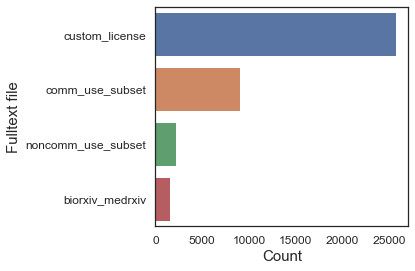

In [248]:
# full text file

df_sub = df_cord19[df_cord19.full_text_file.isin(df_cord19.full_text_file.value_counts()[:20].index.tolist())]
b = sns.countplot(y="full_text_file", data=df_sub, order=df_sub['full_text_file'].value_counts().index)
#b.axes.set_title("Title",fontsize=50)
b.set_xlabel("Count",fontsize=15)
b.set_ylabel("Fulltext file",fontsize=15)
b.tick_params(labelsize=12)
plt.tight_layout()
plt.savefig("figures/license_ft.pdf")

## Dimensions

In [249]:
# load Dimensions data (you will need to download it on your own!)

directory_name = "datasets_output/json_dimensions_cwts"

all_dimensions = list()
for root, dirs, files in os.walk(directory_name):
    for file in files:
        if ".json" in file:
            all_data = codecs.open(os.path.join(root,file)).read()
            for record in all_data.split("\n"):
                if record:
                    all_dimensions.append(json.loads(record))

In [250]:
df_dimensions = pd.DataFrame.from_dict({
    "id":[r["id"] for r in all_dimensions],
    "publication_type":[r["publication_type"] for r in all_dimensions],
    "doi":[r["doi"] for r in all_dimensions],
    "pmid":[r["pmid"] for r in all_dimensions],
    "issn":[r["journal"]["issn"] for r in all_dimensions],
    "times_cited":[r["times_cited"] for r in all_dimensions],
    "relative_citation_ratio":[r["relative_citation_ratio"] for r in all_dimensions],
    "for_top":[r["for"][0]["first_level"]["name"] if len(r["for"])>0 else "" for r in all_dimensions],
    "for_bottom":[r["for"][0]["second_level"]["name"] if len(r["for"])>0 else "" for r in all_dimensions],
    "open_access_versions":[r["open_access_versions"] for r in all_dimensions]
})

In [251]:
df_dimensions.head()

,id,publication_type,doi,pmid,issn,times_cited,relative_citation_ratio,for_top,for_bottom,open_access_versions
0,pub.1016570004,article,10.1290/0408056.1,15780007,1071-2690,35,0.83,Biological Sciences,Biochemistry and Cell Biology,[]
1,pub.1010334513,article,10.1289/ehp.7117,15531441,1542-4359,48,1.12,Medical and Health Sciences,Public Health and Health Services,[]
2,pub.1065069390,article,10.1360/04we0073,32214715,2095-9273,3,NaN,Medical and Health Sciences,Public Health and Health Services,[]
3,pub.1065067866,article,10.1360/03wb0198,32214714,2095-9273,3,NaN,Mathematical Sciences,Statistics,[]
4,pub.1037923003,article,10.1331/1544-3191.44.5.594.hulisz,15496046,1544-3191,48,0.93,Medical and Health Sciences,Clinical Sciences,[]


In [252]:
df_dimensions.pmid = df_dimensions.pmid.astype(float)

In [253]:
df_dimensions.shape

(50026, 10)

In [254]:
df_joined_doi = df_cord19[pd.notnull(df_cord19.doi)].merge(df_dimensions[pd.notnull(df_dimensions.doi)], how="inner", left_on="doi", right_on="doi")

In [255]:
df_joined_doi.shape

(43870, 35)

In [256]:
df_joined_pmid = df_cord19[pd.isnull(df_cord19.doi) & pd.notnull(df_cord19.pmid)].merge(df_dimensions[pd.isnull(df_dimensions.doi) & pd.notnull(df_dimensions.pmid)], how="inner", left_on="pmid", right_on="pmid")

In [257]:
df_joined_pmid.shape

(960, 35)

In [258]:
df_joined = pd.concat([df_joined_doi,df_joined_pmid])

In [259]:
# nearly all publications from CORD-19 are in Dimensions

In [260]:
df_joined.shape

(44830, 38)

In [261]:
df_cord19.shape

(46994, 26)

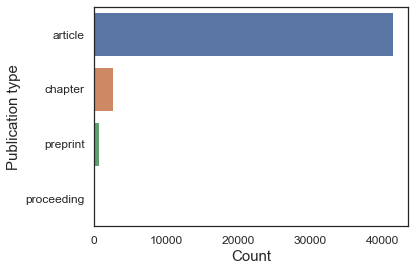

In [262]:
# publication type

df_sub = df_joined[df_joined.publication_type.isin(df_joined.publication_type.value_counts()[:10].index.tolist())]
b = sns.countplot(y="publication_type", data=df_sub, order=df_sub['publication_type'].value_counts().index)
#b.axes.set_title("Title",fontsize=50)
b.set_xlabel("Count",fontsize=15)
b.set_ylabel("Publication type",fontsize=15)
b.tick_params(labelsize=12)
plt.tight_layout()
plt.savefig("figures/dim_pub_type.pdf")

#### Citation counts

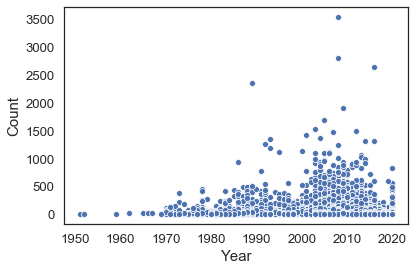

In [263]:
# scatter of citations vs time of publication

sns.scatterplot(df_joined.publication_year.to_list(),df_joined.times_cited.to_list())
plt.xlabel("Year", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.tight_layout()
plt.savefig("figures/dim_citations_year.pdf")

In [264]:
# most cited papers

df_joined[["title","times_cited","relative_citation_ratio","journal","publication_year","doi"]].sort_values("times_cited",ascending=False).head(20)

,title,times_cited,relative_citation_ratio,journal,publication_year,doi
19136,Epidemiology and causes of preterm birth,3552,118.21,The Lancet,2008.0,10.1016/s0140-6736(08)60074-4
22994,Global trends in emerging infectious diseases,2809,69.92,Nature,2008.0,10.1038/nature06536
25210,Guidelines for the use and interpretation of a...,2656,207.85,Autophagy,2016.0,10.1080/15548627.2015.1100356
18737,Biology of Natural Killer Cells,2359,47.86,Advances in Immunology,1989.0,10.1016/s0065-2776(08)60664-1
23273,Knocking down barriers: advances in siRNA deli...,1905,47.47,Nat Rev Drug Discov,2009.0,10.1038/nrd2742
11316,Antimicrobial activity of flavonoids,1702,34.92,International Journal of Antimicrobial Agents,2005.0,10.1016/j.ijantimicag.2005.09.002
18923,Coronavirus as a possible cause of severe acut...,1544,34.22,The Lancet,2003.0,10.1016/s0140-6736(03)13077-2
24490,Isolation of a novel coronavirus from a man wi...,1506,56.44,New England Journal of Medicine,2012.0,10.1056/nejmoa1211721
7359,2007 Guideline for Isolation Precautions: Prev...,1488,36.50,American Journal of Infection Control,2007.0,10.1016/j.ajic.2007.10.007
22638,A newly discovered human pneumovirus isolated ...,1419,32.75,Nat Med,2001.0,10.1038/89098


In [265]:
# same but in 2020; note that duplicates are due to SI or pre-prints with different PMIDs

df_joined[df_joined.publication_year>2019][["title","times_cited","relative_citation_ratio","journal","publication_year","doi"]].sort_values("times_cited",ascending=False).head(10)

,title,times_cited,relative_citation_ratio,journal,publication_year,doi
19362,Clinical features of patients infected with 20...,838,NaN,The Lancet,2020.0,10.1016/s0140-6736(20)30183-5
19361,Clinical features of patients infected with 20...,838,NaN,The Lancet,2020.0,10.1016/s0140-6736(20)30183-5
24497,A Novel Coronavirus from Patients with Pneumon...,571,NaN,New England Journal of Medicine,2020.0,10.1056/nejmoa2001017
24499,"Early Transmission Dynamics in Wuhan, China, o...",500,NaN,New England Journal of Medicine,2020.0,10.1056/nejmoa2001316
19368,Epidemiological and clinical characteristics o...,455,NaN,The Lancet,2020.0,10.1016/s0140-6736(20)30211-7
19369,Epidemiological and clinical characteristics o...,455,NaN,The Lancet,2020.0,10.1016/s0140-6736(20)30211-7
10,Clinical Characteristics of 138 Hospitalized P...,427,NaN,JAMA,2020.0,10.1001/jama.2020.1585
19360,A familial cluster of pneumonia associated wit...,331,NaN,The Lancet,2020.0,10.1016/s0140-6736(20)30154-9
19359,A familial cluster of pneumonia associated wit...,331,NaN,The Lancet,2020.0,10.1016/s0140-6736(20)30154-9
23652,A pneumonia outbreak associated with a new cor...,321,NaN,Nature,2020.0,10.1038/s41586-020-2012-7


In [266]:
# most cited journals

df_joined[['journal','times_cited']].groupby('journal').sum().sort_values('times_cited',ascending=False).head(20)

,times_cited
journal,
Journal of Virology,77287
The Lancet,39295
Proceedings of the National Academy of Sciences,34907
PLoS One,34850
Virology,33602
Emerg Infect Dis,31294
Nature,22220
PLoS Pathog,19189
Journal of Clinical Microbiology,15821


#### Categories

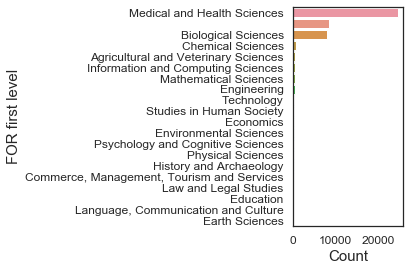

In [278]:
# FOR jeywords distribution, TOP

df_sub = df_joined[df_joined.for_top.isin(df_joined.for_top.value_counts()[:20].index.tolist())]
b = sns.countplot(y="for_top", data=df_sub, order=df_sub['for_top'].value_counts().index)
#b.axes.set_title("Title",fontsize=50)
b.set_xlabel("Count",fontsize=15)
b.set_ylabel("FOR first level",fontsize=15)
b.tick_params(labelsize=12)
plt.tight_layout()
plt.savefig("figures/dim_for_top.pdf")

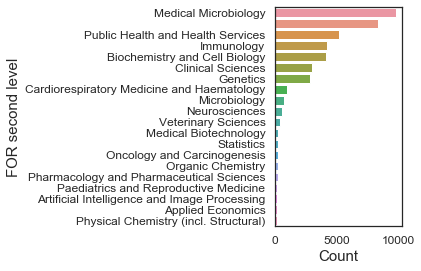

In [279]:
# FOR jeywords distribution, TOP

df_sub = df_joined[df_joined.for_bottom.isin(df_joined.for_bottom.value_counts()[:20].index.tolist())]
b = sns.countplot(y="for_bottom", data=df_sub, order=df_sub['for_bottom'].value_counts().index)
#b.axes.set_title("Title",fontsize=50)
b.set_xlabel("Count",fontsize=15)
b.set_ylabel("FOR second level",fontsize=15)
b.tick_params(labelsize=12)
plt.tight_layout()
plt.savefig("figures/dim_for_bottom.pdf")